In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv(r"C:\Users\athar\OneDrive\Desktop\data.csv")

In [51]:
df

,ID,Age,Income,Gender,Marital Status,Buys
0,1,< 21,High,Male,Single,No
1,2,< 21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,< 21,Medium,Male,Single,No
8,9,< 21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              14 non-null     int64 
 1   Age             14 non-null     object
 2   Income          14 non-null     object
 3   Gender          14 non-null     object
 4   Marital Status  14 non-null     object
 5   Buys            14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [53]:
df.describe()

,ID
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [54]:
df.isna().sum()

ID                0
Age               0
Income            0
Gender            0
Marital Status    0
Buys              0
dtype: int64

In [55]:
x = df.drop(['Buys'], axis=1)
y = df['Buys']

In [56]:
x = pd.get_dummies(x, drop_first=True)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
model = DecisionTreeClassifier()

In [59]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
predictions = model.predict(x_test)

In [61]:
predictions

array(['Yes', 'No', 'No'], dtype=object)

In [62]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



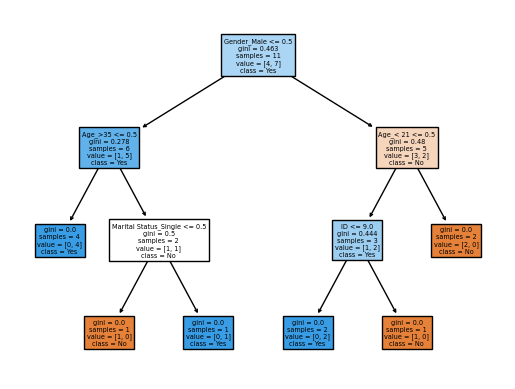

In [63]:
dt = tree.plot_tree(model, feature_names=x.columns, class_names=['No', 'Yes'], filled=True)